#  **Taxi Fare Prediction Model**

## **Data Preparation**

### **Training Data Import**

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Colab Notebooks/Fare_Prediction_Model/Dataset/Train_fare.csv"
df = pd.read_csv(path)
df

,trip_duration,distance_traveled,distance_traveled.1,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,771,2.87,2.75,1,75.00,24,6.300,105.300,0
1,1210,3.55,3.43,1,105.00,24,13.200,142.200,0
2,753,3.24,3.12,1,71.25,0,26.625,97.875,1
3,694,5.75,5.63,3,90.00,0,9.750,99.750,0
4,352,2.21,2.09,1,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...,...
209668,1640,8.54,8.42,1,150.00,47,5.800,202.800,0
209669,461,1.41,1.29,1,48.75,12,34.575,95.325,1
209670,594,2.94,2.82,1,63.75,0,6.000,69.750,0
209671,514,2.28,2.16,1,56.25,0,13.500,69.750,0


---

**Could not import Testing Dataset as it was corrupted**

---



### **Seperating Dataset as X and Y**

---

**'y' is the output(Total Fare)**

---

In [ ]:
y = df['total_fare']
y

0         105.300
1         142.200
2          97.875
3          99.750
4          70.200
           ...   
209668    202.800
209669     95.325
209670     69.750
209671     69.750
209672    339.750
Name: total_fare, Length: 209673, dtype: float64


---
**'x' is all the others but 'y' as a DataSet**

---

In [ ]:
x = df.drop('total_fare' , axis = 1)
x

,trip_duration,distance_traveled,distance_traveled.1,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,771,2.87,2.75,1,75.00,24,6.300,0
1,1210,3.55,3.43,1,105.00,24,13.200,0
2,753,3.24,3.12,1,71.25,0,26.625,1
3,694,5.75,5.63,3,90.00,0,9.750,0
4,352,2.21,2.09,1,45.00,12,13.200,0
...,...,...,...,...,...,...,...,...
209668,1640,8.54,8.42,1,150.00,47,5.800,0
209669,461,1.41,1.29,1,48.75,12,34.575,1
209670,594,2.94,2.82,1,63.75,0,6.000,0
209671,514,2.28,2.16,1,56.25,0,13.500,0


### **Splitting Dataset as Training Set and Testing Set**

---

**Splitting the Dataset as Training and Testing in 80/20 Ratio**

---

In [ ]:
import numpy as np
shuffled_indices = np.random.permutation(df.index)
train_set = int(0.8 * len(df))
train_df = df.loc[shuffled_indices[:train_set]]
test_df = df.loc[shuffled_indices[train_set:]]

In [ ]:
y_train_df = train_df['total_fare']
x_train_df = train_df.drop('total_fare' , axis =1)
y_test_df =  test_df['total_fare']
x_test_df = test_df.drop('total_fare' , axis =1)

In [ ]:
print(y_train_df)

83668      61.200
84303      66.000
11091     351.450
201249    112.950
182914    130.950
           ...   
22231     240.375
153204     47.250
152801    157.875
132784     88.200
128805     73.500
Name: total_fare, Length: 167738, dtype: float64


In [ ]:
print(x_train_df)

        trip_duration  distance_traveled  distance_traveled.1  \
83668             282               1.29                 1.17   
84303             602               2.58                 2.46   
11091            1894              19.19                19.07   
201249            679               2.69                 2.57   
182914            669               3.72                 3.60   
...               ...                ...                  ...   
22231            2367               9.74                 9.62   
153204            317               1.65                 1.53   
152801           1005               5.19                 5.07   
132784            541               3.16                 3.04   
128805            670               2.65                 2.53   

        num_of_passengers    fare  tip  miscellaneous_fees  surge_applied  
83668                   1   37.50   10              13.700              0  
84303                   1   60.00    0               6.000         

In [ ]:
print(y_test_df)

200084    114.750
106669    257.250
58694      43.500
113714     79.125
160673     97.200
           ...   
16881     121.875
6913      157.875
147257    255.375
45434     262.875
105561     28.500
Name: total_fare, Length: 41935, dtype: float64


In [ ]:
print(x_test_df)

        trip_duration  distance_traveled  distance_traveled.1  \
200084           1030               6.12                 6.00   
106669           2115              16.99                16.87   
58694             287               1.10                 0.98   
113714            414               1.34                 1.22   
160673            751               2.34                 2.22   
...               ...                ...                  ...   
16881             712               3.34                 3.22   
6913             1230               5.88                 5.76   
147257           1688              12.27                12.15   
45434            1368              13.77                13.65   
105561             95               0.36                 0.24   

        num_of_passengers    fare  tip  miscellaneous_fees  surge_applied  
200084                  1  112.50    0               2.250              0  
106669                  1  251.25    0               6.000         

## Data Relation Statistics

**#Trying to find the variable that is most affecting the total_fare**

### Most Affecting variable

In [ ]:
df.corr()['total_fare']

trip_duration          0.142159
distance_traveled      0.036677
distance_traveled.1    0.036677
num_of_passengers      0.014234
fare                   0.966748
tip                    0.508639
miscellaneous_fees     0.452568
total_fare             1.000000
surge_applied          0.267350
Name: total_fare, dtype: float64

**--> 'Fare' is the most affecting variable**

***Graphs for the 3 most affecting variables :***

*#Relation Between total_fare and other variables as a graph*

1. Fare

### Using matplotlib for Visualisation

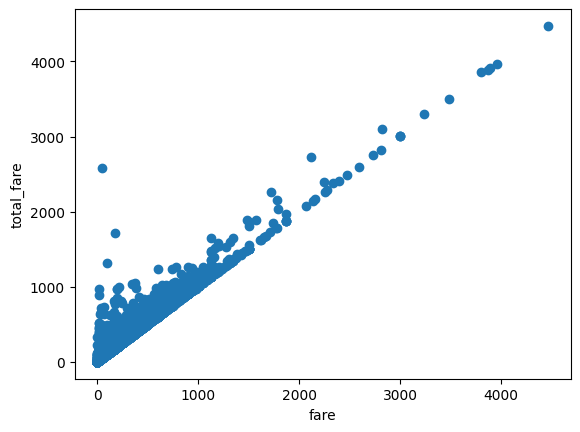

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['fare'], df['total_fare'])
plt.xlabel('fare')
plt.ylabel('total_fare')
plt.show()

2.Tip

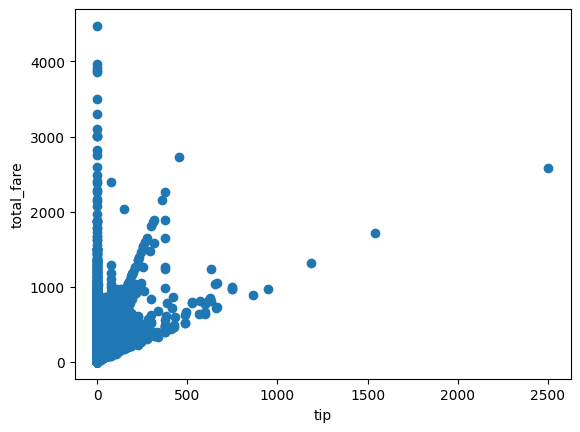

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['tip'], df['total_fare'])
plt.xlabel('tip')
plt.ylabel('total_fare')
plt.show()

3.Miscellaneous Fees

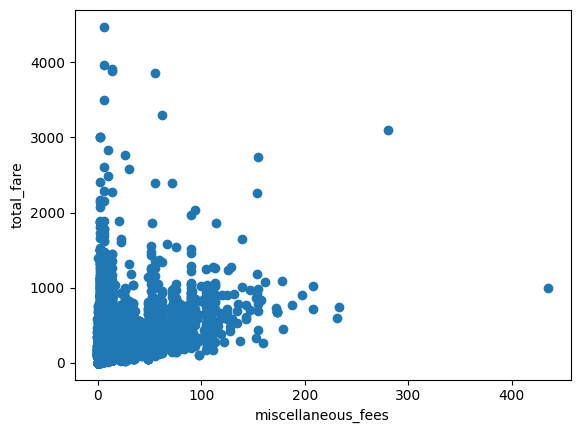

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['miscellaneous_fees'], df['total_fare'])
plt.xlabel('miscellaneous_fees')
plt.ylabel('total_fare')
plt.show()

##Linear Regression Model Building

###Creating a table for the most affecting variables (Train dataset)

In [ ]:
x_train_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

predictions_df = pd.DataFrame({
    'Fare': x_train_df['fare'],
    'Tip': x_train_df['tip'],
    'Miscellaneous Fees': x_train_df['miscellaneous_fees'],
    'total_fare': y_train_df
})

In [ ]:
predictions_df

,Fare,Tip,Miscellaneous Fees,total_fare
0,37.50,10,13.700,61.200
1,60.00,0,6.000,66.000
2,266.25,59,26.200,351.450
3,67.50,19,26.450,112.950
4,75.00,22,33.950,130.950
...,...,...,...,...
167733,213.75,0,26.625,240.375
167734,41.25,0,6.000,47.250
167735,101.25,22,34.625,157.875
167736,60.00,15,13.200,88.200


###Code for Linear Regression with multiple variables

In [ ]:
import numpy as np
import pandas as pd

def get_predictions(model, X):
    '''
    Obtain the predictions for the given model and inputs.

    model: np.array of Floats with shape (p,) of parameters
    X: np.array of Floats with shape (n, p-1) of inputs

    Returns: np.array of Floats with shape (n,).
    '''

    (n, p_minus_one) = X.shape
    p = p_minus_one + 1

    new_X = np.ones(shape=(n, p))
    new_X[:, 1:] = X

    return np.dot(new_X, model)

***Testing the model with different parameters***

---

*The four values mentioned below were obtained after main iterations of trial and error and this was the closest among several outputs that were obtained*

---

In [ ]:
test_model = np.array([1, 1/4, 1/3, 1.2])
predictions = get_predictions(test_model, x_train_df.iloc[:, :3])
print(predictions.shape)

(167738,)


In [ ]:
predictions_df['Test Predictions'] = get_predictions(test_model, x_train_df.iloc[:, :3])
predictions_df

,Fare,Tip,Miscellaneous Fees,total_fare,Test Predictions
0,37.50,10,13.700,61.200,73.334000
1,60.00,0,6.000,66.000,155.312000
2,266.25,59,26.200,351.450,503.780667
3,67.50,19,26.450,112.950,174.730667
4,75.00,22,33.950,130.950,173.810000
...,...,...,...,...,...
167733,213.75,0,26.625,240.375,607.540667
167734,41.25,0,6.000,47.250,82.636000
167735,101.25,22,34.625,157.875,260.064000
167736,60.00,15,13.200,88.200,140.951333


---

*This code was implemented to improve the accuracy of the model , which is named as 'best predictions' column in the below table*

---

### Improving Accuracy

In [ ]:
from numpy.linalg import inv

def get_best_model(X, y):
  '''
  Returns the model with the parameters that minimize the MSE.

  X: np.array of Floats with shape (n, p-1) of inputs
  y: np.array of Floats with shape (n,) of observed outputs

  Returns: np.array of shape (p,) representing the model.
  '''

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(np.dot(inv(np.dot(new_X.T, new_X)), new_X.T), y)

In [ ]:
best_model = get_best_model(x_train_df, y_train_df)
Best_Predictions1= get_predictions(best_model, x_train_df)
predictions_df['Best Predictions'] = Best_Predictions1
predictions_df

,Fare,Tip,Miscellaneous Fees,total_fare,Test Predictions,Best Predictions
0,37.50,10,13.700,61.200,73.334000,67.418303
1,60.00,0,6.000,66.000,155.312000,71.766185
2,266.25,59,26.200,351.450,503.780667,351.359230
3,67.50,19,26.450,112.950,174.730667,118.678256
4,75.00,22,33.950,130.950,173.810000,136.313930
...,...,...,...,...,...,...
167733,213.75,0,26.625,240.375,607.540667,243.631612
167734,41.25,0,6.000,47.250,82.636000,53.341449
167735,101.25,22,34.625,157.875,260.064000,162.723366
167736,60.00,15,13.200,88.200,140.951333,93.760336


---

*As we can see above the Best Predicitions are very close to the total fare , therefore the model is nearly accurate , however the accuracy will be checked in the futher steps after the test set is implemented too*

---

###Creating a table for the test dataset

In [ ]:
x_test_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

predictions_df1 = pd.DataFrame({
    'Fare': x_test_df['fare'],
    'Tip': x_test_df['tip'],
    'Miscellaneous Fees': x_test_df['miscellaneous_fees'],
    'total_fare': y_test_df
})

In [ ]:
predictions_df1

,Fare,Tip,Miscellaneous Fees,total_fare
0,112.50,0,2.250,114.750
1,251.25,0,6.000,257.250
2,37.50,0,6.000,43.500
3,45.00,0,34.125,79.125
4,67.50,16,13.700,97.200
...,...,...,...,...
41930,75.00,20,26.875,121.875
41931,116.25,15,26.625,157.875
41932,198.75,26,30.625,255.375
41933,195.00,38,29.875,262.875


### Implementing Linear Regression

In [ ]:
test_predictions1= get_predictions(test_model, x_test_df.iloc[:, :3])
predictions_df1['Test Predictions'] = test_predictions1
predictions_df1

,Fare,Tip,Miscellaneous Fees,total_fare,Test Predictions
0,112.50,0,2.250,114.750,267.740000
1,251.25,0,6.000,257.250,555.657333
2,37.50,0,6.000,43.500,74.292667
3,45.00,0,34.125,79.125,106.410667
4,67.50,16,13.700,97.200,192.194000
...,...,...,...,...,...
41930,75.00,20,26.875,121.875,183.977333
41931,116.25,15,26.625,157.875,317.372000
41932,198.75,26,30.625,255.375,441.670000
41933,195.00,38,29.875,262.875,363.970000


---

*As we can see the test predictions are far off of the total fare so we need to implement the best model program for this dataset too*

---

### Implementing Accuracy Model for Test dataset

In [ ]:
best_model = get_best_model(x_test_df, y_test_df)
best_predictions = get_predictions(best_model, x_test_df)
predictions_df1['Best Predictions'] = best_predictions
predictions_df1

,Fare,Tip,Miscellaneous Fees,total_fare,Test Predictions,Best Predictions
0,112.50,0,2.250,114.750,267.740000,114.730252
1,251.25,0,6.000,257.250,555.657333,257.236051
2,37.50,0,6.000,43.500,74.292667,43.477580
3,45.00,0,34.125,79.125,106.410667,79.102706
4,67.50,16,13.700,97.200,192.194000,97.178233
...,...,...,...,...,...,...
41930,75.00,20,26.875,121.875,183.977333,121.853770
41931,116.25,15,26.625,157.875,317.372000,157.855118
41932,198.75,26,30.625,255.375,441.670000,255.358532
41933,195.00,38,29.875,262.875,363.970000,262.859344


---

*The best possible output is obtained for the test dataset with our ML model*

---

## Evaluation Metric

### Mean Squared Error (MSE) Method

In [ ]:
def mean_squared_error(Best_Predictions, total_fare):
    errors = [(Best_Predictions[i] - total_fare[i]) for i in range(len(Best_Predictions))]
    squared_errors = [(error ** 2) for error in errors]
    mse = sum(squared_errors) / len(squared_errors)
    return mse

#### Mean Squared Error (MSE) Method for Train Dataset

In [ ]:
Best_Predictions = predictions_df['Best Predictions']
total_fare = predictions_df['total_fare']
mse = mean_squared_error(Best_Predictions1, total_fare)
print("mse : " , mse)

mse :  28.704331899745192


#### Mean Squared Error (MSE) Method for Test Dataset

In [ ]:
Best_Predictions = predictions_df1['Best Predictions']
total_fare = predictions_df1['total_fare']
mse1 = mean_squared_error(best_predictions, total_fare)
print("mse1 : " , mse1)

mse1 :  0.022871890985363616


### Rooted Mean Square (RMSE) Method

#### Rooted Mean Squared Error (MSE) Method for Train Dataset

In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 5.357642382591917


#### Rooted Mean Squared Error (MSE) Method for Test Dataset

In [ ]:
rmse1 = np.sqrt(mse1)
print("RMSE1:", rmse1)

RMSE1: 0.15123455618794143


### Mean Absolute Error (MAE) Method

#### Mean Absolute Error (MAE) Method for Train Dataset

In [ ]:
actual = np.array(predictions_df['Best Predictions'])

predicted = np.array(predictions_df['total_fare'])

mae = np.mean(np.abs(actual - predicted))

print("MAE:", mae)

MAE: 5.08299227235442


#### Mean Absolute Error (MAE) Method for Test Dataset

In [ ]:
actual = np.array(predictions_df1['Best Predictions'])

predicted = np.array(predictions_df1['total_fare'])

mae1 = np.mean(np.abs(actual - predicted))

print("MAE1:", mae1)

MAE1: 0.021152512032616217




---


*Creating a Table for easy understanding*


---



In [ ]:
df_results = pd.DataFrame(["Linear Regression" , mse , mse1 , rmse , rmse1 , mae , mae1]).transpose()
df_results.columns = ['Method' , 'Training MSE' , 'Testing MSE' , 'Training RMSE' , 'Testing RMSE' , 'Training MAE' , 'Testing MAE']
df_results

,Method,Training MSE,Testing MSE,Training RMSE,Testing RMSE,Training MAE,Testing MAE
0,Linear Regression,28.704332,0.022872,5.357642,0.151235,5.082992,0.021153


## Implementing Random Forest

### Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train_df, y_train_df)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the Model

In [ ]:
y_rf_train_pred = rf.predict(x_train_df)
y_rf_test_pred = rf.predict(x_test_df)

### Performance of the Model

In [ ]:
from sklearn.metrics import mean_squared_error

rf_train_mse = mean_squared_error(y_train_df, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test_df, y_rf_test_pred)

### Adding the Model to the Tabular Column

In [ ]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_test_mse,]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Testing MSE']
rf_results

,Method,Training MSE,Testing MSE
0,Random forest,2596.736589,2317.981823




---


*Combining both the tabular columns*


---



In [ ]:
df_models = pd.concat([df_results, rf_results], axis=0)
df_models

,Method,Training MSE,Testing MSE,Training RMSE,Testing RMSE,Training MAE,Testing MAE
0,Linear Regression,28.704332,0.022872,5.357642,0.151235,5.082992,0.021153
0,Random forest,2596.736589,2317.981823,NaN,NaN,NaN,NaN


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Testing MSE,Training RMSE,Testing RMSE,Training MAE,Testing MAE
0,Linear Regression,28.704332,0.022872,5.357642,0.151235,5.082992,0.021153
1,Random forest,2596.736589,2317.981823,NaN,NaN,NaN,NaN


## Implementing Gradient Boosting Regressor Model

### Importing the Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

### Training the Model

In [ ]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train_df, y_train_df)

GradientBoostingRegressor()

### Performance of the Model

In [ ]:
y_train_pred = gb_model.predict(x_train_df)
y_test_pred = gb_model.predict(x_test_df)
Training_mse = mean_squared_error(y_train_df, y_train_pred)
Testing_mse = mean_squared_error(y_test_df, y_test_pred)

### Adding the Model to the Tabular Column

In [ ]:
gf_results = pd.DataFrame(['Gradient Boosting Regressor', Training_mse, Testing_mse]).transpose()
gf_results.columns = ['Method', 'Training MSE', 'Testing MSE']
gf_results

,Method,Training MSE,Testing MSE
0,Gradient Boosting Regressor,12.490564,18.268251


In [ ]:
df_models = pd.concat([df_results, rf_results,gf_results], axis=0)
df_models

,Method,Training MSE,Testing MSE,Training RMSE,Testing RMSE,Training MAE,Testing MAE
0,Linear Regression,28.704332,0.022872,5.357642,0.151235,5.082992,0.021153
0,Random forest,2596.736589,2317.981823,NaN,NaN,NaN,NaN
0,Gradient Boosting Regressor,12.490564,18.268251,NaN,NaN,NaN,NaN


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Testing MSE,Training RMSE,Testing RMSE,Training MAE,Testing MAE
0,Linear Regression,28.704332,0.022872,5.357642,0.151235,5.082992,0.021153
1,Random forest,2596.736589,2317.981823,NaN,NaN,NaN,NaN
2,Gradient Boosting Regressor,12.490564,18.268251,NaN,NaN,NaN,NaN


## Data visualization of prediction results

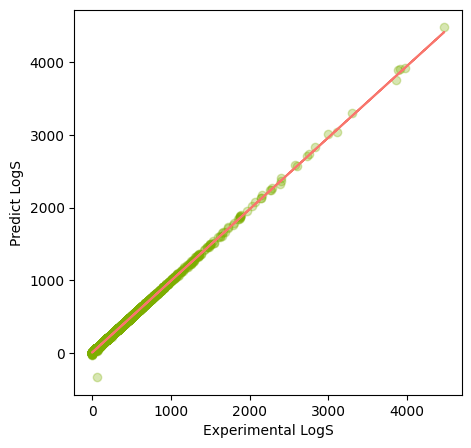

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(x=y_train_df, y=Best_Predictions1, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train_df, Best_Predictions1, 1)
p = np.poly1d(z)

plt.plot(y_train_df, p(y_train_df), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

plt.show()